In [1]:
# description: Use stock indicators to determine when to buy or sell stock

In [2]:
# Import the libs
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

In [4]:
# get the data
df = pd.read_csv('Data/TSLA.csv')
# set data as index 
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
# show data
df 

,Date,Open,High,Low,Close,Adj Close,Volume
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000
...,...,...,...,...,...,...,...
2020-09-04,2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900
2020-09-08,2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700
2020-09-09,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800
2020-09-10,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600


In [5]:
# create functions to calculate the SMA and EMA
# SMA
def SMA(data, period=30, column='Close'):
    return data[column].rolling(window=period).mean()

# EMA
def EMA(data, period=20, column='Close'):
    return data[column].ewm(span=period, adjust=False).mean()

In [6]:
# calculate the Moving Average Convergence/Divergence (MACD)
def MACD(data, period_long=26, period_short=12, period_signal=9, column='Close'):
    # calc the Short Term EMA
    ShortEMA = EMA(data, period_short, column=column)
    # calc the Long Term EMA
    LongEMA = EMA(data, period_long, column=column)
    # calc the MACD
    data['MACD'] = ShortEMA - LongEMA
    # calc the signal line
    data['Signal_Line'] = EMA(data, period_signal, column='MACD')

    return data 

In [7]:
# Create a function to compute the Relative Strength Index (RSI)
def RSI(data, period=14, column='Close'):
    delta = data[column].diff(1)
    delta = delta[1:]
    up = delta.copy()
    down = delta.copy()
    up[up < 0] = 0
    down[down > 0] = 0
    data['Up'] = up 
    data['Down'] = down 
    AVG_Gain = SMA(data, period, column='Up')
    AVG_Loss = abs(SMA(data, period, column='Down'))
    RS = AVG_Gain/AVG_Loss
    RSI = 100.0 - (100.0/(1.0 + RS))

    data['RSI'] = RSI 

    return data 

In [8]:
# Create/add to the dataset
MACD(df)
RSI(df)
df['SMA'] = SMA(df)
df['EMA'] = EMA(df)

In [9]:
# show data
df 

,Date,Open,High,Low,Close,Adj Close,Volume,MACD,Signal_Line,Up,Down,RSI,SMA,EMA
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500,0.000000,0.000000,NaN,NaN,NaN,NaN,48.562000
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000,0.031590,0.006318,0.396000,0.000000,NaN,NaN,48.599714
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000,0.035239,0.012102,0.000000,-0.259998,NaN,NaN,48.609075
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000,0.087315,0.027145,0.621998,0.000000,NaN,NaN,48.676782
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000,0.031712,0.028058,0.000000,-1.195999,NaN,NaN,48.624136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-04,2020-09-04,402.809998,428.000000,372.019989,418.320007,418.320007,110321900,37.702796,39.130201,11.320007,0.000000,59.780366,359.856131,399.630722
2020-09-08,2020-09-08,356.000000,368.739990,329.880005,330.209991,330.209991,115465700,27.586163,36.821393,0.000000,-88.110016,43.047996,360.599130,393.019224
2020-09-09,2020-09-09,356.600006,369.000000,341.510010,366.279999,366.279999,79465800,22.223033,33.901721,36.070008,0.000000,48.739456,362.965197,390.472631
2020-09-10,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600,18.171543,30.755686,5.059997,0.000000,45.903593,365.349130,388.650476


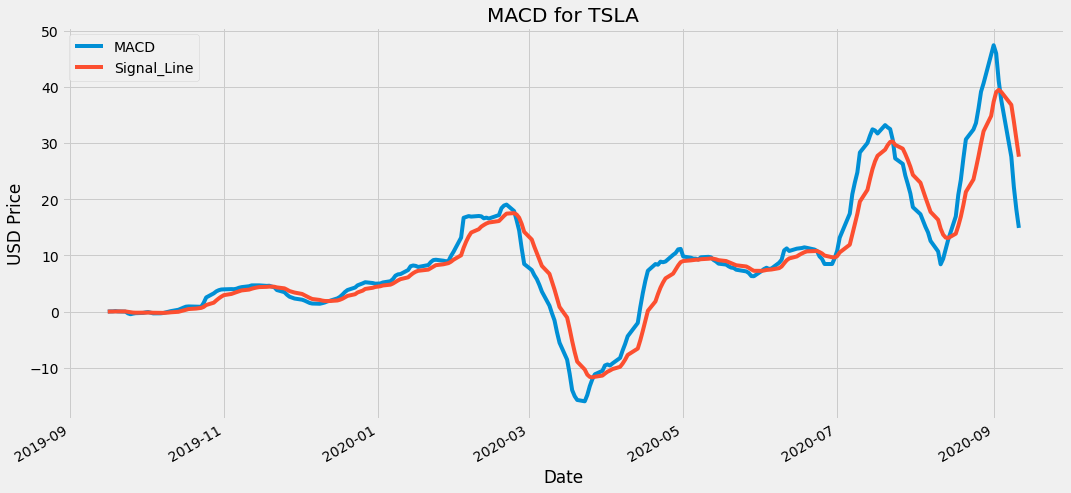

In [10]:
# Plot the chart
# create a lsit of columns to keep
column_list = ['MACD', 'Signal_Line']
df[column_list].plot(figsize=(16, 8))
plt.title('MACD for TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

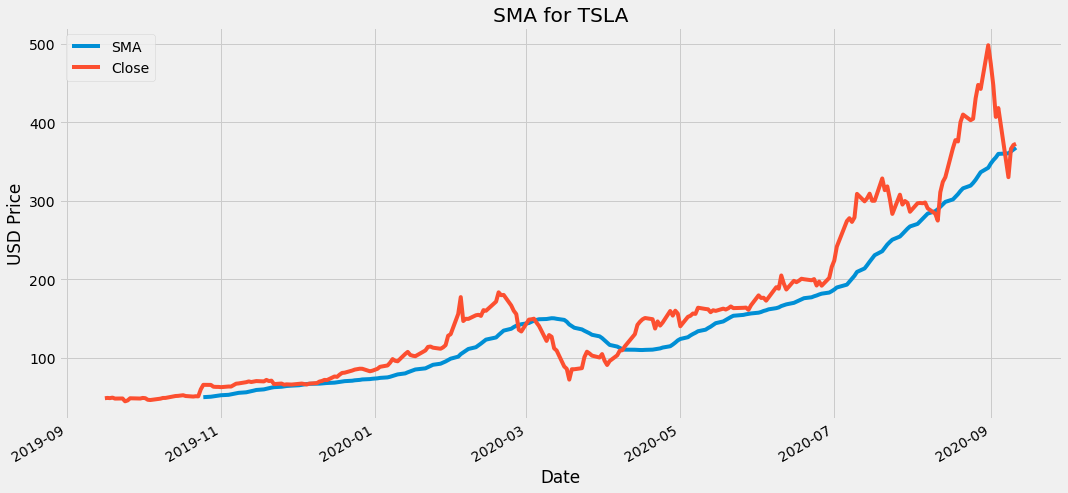

In [11]:
# Plot the chart
# create a lsit of columns to keep
column_list = ['SMA', 'Close']
df[column_list].plot(figsize=(16, 8))
plt.title('SMA for TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

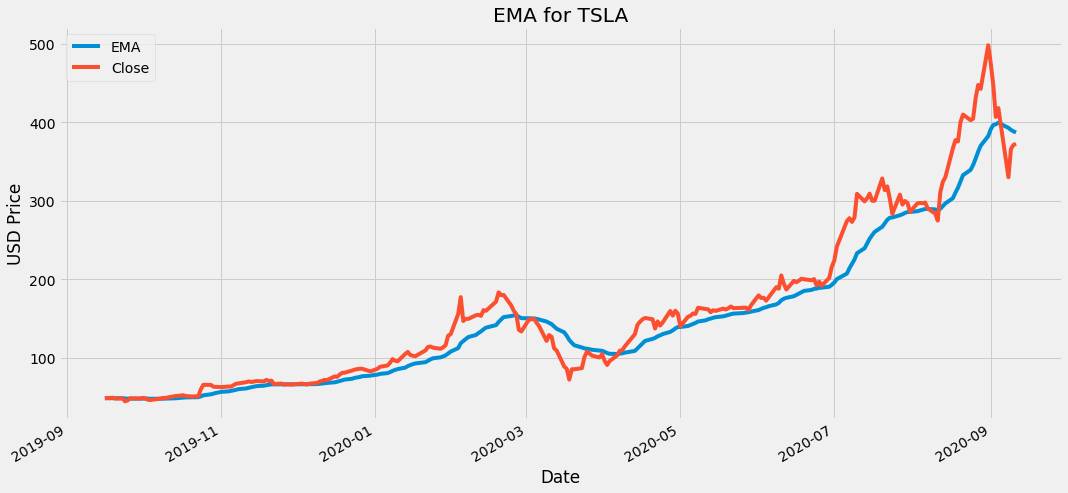

In [12]:
# Plot the chart
# create a lsit of columns to keep
column_list = ['EMA', 'Close']
df[column_list].plot(figsize=(16, 8))
plt.title('EMA for TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()

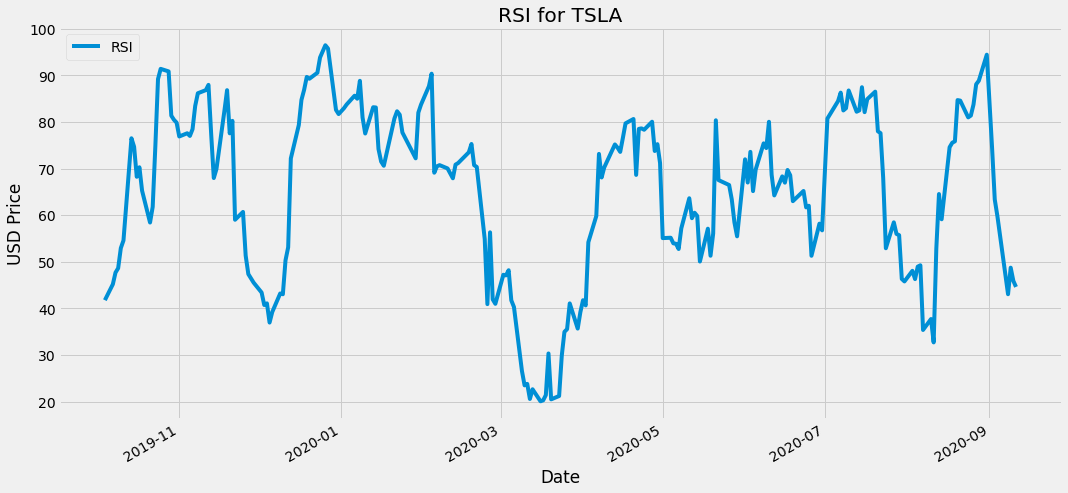

In [13]:
# Plot the chart
# create a lsit of columns to keep
column_list = ['RSI']
df[column_list].plot(figsize=(16, 8))
plt.title('RSI for TSLA')
plt.ylabel('USD Price')
plt.xlabel('Date')
plt.show()